# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [ ]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# build out the query_url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# response = requests.get(query_url + city).json()
# response

{'cod': '400', 'message': 'Nothing to geocode'}

In [9]:
# create lists for weather check (temperature)
city_names = []
countries = []
lat = []
lng = []
temp = []
temp_max = []
humid = []
clouds = []
wind_sp = []


# set initial count quantities for organization while printing output
count_one = 0
set_one = 1

# begin loop for weather data
for city in cities:
    
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        countries.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_sp.append(response['wind']['speed'])
        
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_names.append(city)
        else:
            count_one += 1
            city_names.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------Data Retrieval Complete------------------------------")



Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | port lincoln
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | akcakoca
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | ixtapa
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | borogontsy
Processing Record 22 of Set 1 | tessalit
Processing Record 23 of Set 1 | sibolga
Processing Record 24 of Set 1 

Processing Record 38 of Set 4 | dudinka
Processing Record 39 of Set 4 | chekhov
Processing Record 40 of Set 4 | broome
Processing Record 41 of Set 4 | birobidzhan
City not found. Skipping...
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | acajutla
Processing Record 44 of Set 4 | sweetwater
Processing Record 45 of Set 4 | bluff
Processing Record 46 of Set 4 | mount pleasant
Processing Record 47 of Set 4 | port hedland
City not found. Skipping...
Processing Record 48 of Set 4 | grand gaube
Processing Record 49 of Set 4 | assiniboia
Processing Record 1 of Set 5 | pueblo
City not found. Skipping...
Processing Record 2 of Set 5 | tasiilaq
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | beringovskiy
Processing Record 5 of Set 5 | marica
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | guane
Processing Record 8 of Set 5 | rio gallegos
Processing Record 9 of Set 5 | san cristobal
Processing Record 10 of Set 5 | palmer
Processin

Processing Record 27 of Set 8 | macapa
Processing Record 28 of Set 8 | skegness
Processing Record 29 of Set 8 | tadine
Processing Record 30 of Set 8 | aitape
Processing Record 31 of Set 8 | mandalgovi
Processing Record 32 of Set 8 | nalut
Processing Record 33 of Set 8 | gorin
City not found. Skipping...
Processing Record 34 of Set 8 | iskateley
Processing Record 35 of Set 8 | ternate
Processing Record 36 of Set 8 | yurginskoye
City not found. Skipping...
Processing Record 37 of Set 8 | metro
Processing Record 38 of Set 8 | half moon bay
Processing Record 39 of Set 8 | darhan
Processing Record 40 of Set 8 | alice springs
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | kasama
Processing Record 44 of Set 8 | sao jose da tapera
Processing Record 45 of Set 8 | saint-joseph
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | thyboron
Processing Record 48 of Set 8 | sistranda
Processing Record 49 of Set 8 | san f

City not found. Skipping...
Processing Record 17 of Set 12 | sedalia
Processing Record 18 of Set 12 | karratha
Processing Record 19 of Set 12 | zhaozhou
Processing Record 20 of Set 12 | dolores
Processing Record 21 of Set 12 | republic
Processing Record 22 of Set 12 | pombas
Processing Record 23 of Set 12 | mahanoro
Processing Record 24 of Set 12 | odweyne
Processing Record 25 of Set 12 | kargasok
Processing Record 26 of Set 12 | turangi
City not found. Skipping...
------------------------------Data Retrieval Complete------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Creating list of dictionaries for pulled weather data
weather_dict = {
    "City": city_names,
    "Country": countries,
    "Latitude": lat,
    "Longitude": lng,
    "Temp (°F)": temp,
    "Max Temp (°F)": temp_max,
    "Humidity (%)": humid,
    "Cloudiness (%)": clouds,
    "Wind Speed (mph)": wind_sp}

In [22]:
# Converting list into a Pandas DataFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Latitude,Longitude,Temp (°F),Max Temp (°F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,bredasdorp,ZA,-34.5322,20.0403,55.40,55.40,82,2,4.61
1,port lincoln,CD,-7.0349,29.7638,72.30,72.30,71,65,8.08
2,mataura,NZ,-46.1927,168.8643,49.30,49.30,78,97,6.71
3,akcakoca,TR,41.0866,31.1162,34.75,34.75,86,53,5.93
4,ponta do sol,PT,38.7333,-28.2667,58.98,58.98,98,100,28.74


In [23]:
weather_df.count()

City                565
Country             565
Latitude            565
Longitude           565
Temp (°F)           565
Max Temp (°F)       565
Humidity (%)        565
Cloudiness (%)      565
Wind Speed (mph)    565
dtype: int64

In [24]:
# Output the weather dataframe to a csv file for later use/reference
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#Inspecting for a humidity value > 100
weather_df["Humidity (%)"].max()

100

In [ ]:
# All humidity levels are <= 100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

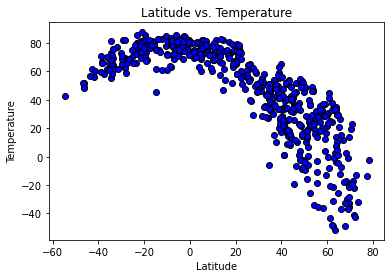

In [28]:
plt.scatter(weather_df["Latitude"], weather_df["Temp (°F)"], marker="o", facecolors="blue",
           edgecolors ="black")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

## DO WE SAVE THIS?

## Latitude vs. Humidity Plot

In [ ]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o", facecolors="blue",
           edgecolors ="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylable("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker="o", facecolors="blue",
           edgecolors ="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylable("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_df["lat"], weather_df["wind_sp"], marker="o", facecolors="blue",
           edgecolors ="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylable("Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression